# Random Forest

#### The candidate with level 6.5 had a previous salary of 160000. In order to hire him in our new company,we would like to confirm if he is being honest about his last salary and we will can predict this using the Random Forest.

In [4]:
#importing all the libraries needed for the process

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%inline matplolib

UsageError: Line magic function `%inline` not found.


In [6]:
#reading the csv data using pandas to salary

In [3]:
salary=pd.read_csv("C:/Users/LENOVO/Desktop/PSR/Sweety/Datasets/Position_Salaries.csv")
salary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
salary.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
#describe() is used to describe the data 

In [4]:
salary.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [9]:
#There are no null values present in the data

In [10]:
#Using the scatterplot to find the relation between level and salary

<AxesSubplot:xlabel='Level', ylabel='Salary'>

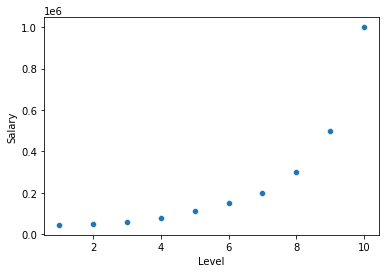

In [11]:
sns.scatterplot(data=salary,x='Level',y='Salary')

In [12]:
#There is a polynomial relation between the variables that is if the level increase the salary also increases

In [13]:
salary.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [14]:
#Finding the relation between the variables.There is a strong relation between the variables.

In [15]:
#It is clear that the Salary is independent variable and the level is dependent variable.
#Now dividing the X and Y based on the variables.

In [780]:
X=salary.iloc[:,1].values
Y=salary.iloc[:,-1].values

In [781]:
#importing the train_test_split method from sklearn

In [782]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [783]:
#reshaping the train and test dataset to minimize the value error in the further process.

In [784]:
X_train=np.array(X_train).reshape(-1, 1)
Y_train=np.array(Y_train).reshape(-1, 1)
X_test=np.array(X_test).reshape(-1, 1)
Y_test=np.array(Y_test).reshape(-1, 1)

In [785]:
#importing the Random tree regressor form the sklearn.ensemble

In [786]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
rfr.fit(X_train,Y_train.ravel())

RandomForestRegressor(random_state=1)

In [787]:
#We should always work on the dataset having testing score greater than the training dataset.
#Inorder to get the required score we should change the n_estimators,test_size and random_states.

In [788]:
print("Training dataset Score:",rfr.score(X_train,Y_train))
print("Testing dataset Score:",rfr.score(X_test,Y_test))

Training dataset Score: 0.883197840979863
Testing dataset Score: 0.9909168388429752


In [789]:
x_pred=rfr.predict(X_train)
y_pred=rfr.predict(X_test)

In [790]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Root Mean Squared Error of train dataset:', np.sqrt(metrics.mean_squared_error(Y_train, x_pred)))
print('Root Mean Squared Error of test:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 16250.0
Root Mean Squared Error of train dataset: 101634.8626825461
Root Mean Squared Error of test: 20967.236346261754


In [ ]:
#Here the Mean absolute error is 16250 that is  average distance between the real data and the 
#predicted data is 16250

##The rmse value for the predicted data is 20967 which means the actual data is that specified units away(approx)
#from the predicted one.

In [791]:
#Now predicting if he is being honest about his last salary by predicting the sal for the level 6.5

In [792]:
new_val= np.array(6.5).reshape(-1,1)
our_pred=rfr.predict(new_val)
our_pred

array([164100.])

In [793]:
#The candidate with level 6.5 had a previous salary of 160000 was the one he stated.
#Here we predicted it to be 164100 which is appx the same value
#So we conclude that he is being honest about his last salary